In [1]:
#Importing the Essential libraries and their Functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gensim
from gensim.models import word2vec

In [3]:
import sklearn

In [4]:
data = pd.read_csv("C:/Users/HP/Desktop/LinkedIn/Apziva/Projects/Potential Talents/potential-talents.csv")

data

,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN


# Feature Engineering

#EDA

In [5]:
data.head(20)

,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
5,6.0,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN
6,7.0,Student at Humber College and Aspiring Human R...,Kanada,61,NaN
7,8.0,HR Senior Specialist,San Francisco Bay Area,500+,NaN
8,9.0,Student at Humber College and Aspiring Human R...,Kanada,61,NaN
9,10.0,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+,NaN


In [6]:
data.tail(20)

,id,job_title,location,connection,fit
979,NaN,NaN,NaN,NaN,NaN
980,NaN,NaN,NaN,NaN,NaN
981,NaN,NaN,NaN,NaN,NaN
982,NaN,NaN,NaN,NaN,NaN
983,NaN,NaN,NaN,NaN,NaN
984,NaN,NaN,NaN,NaN,NaN
985,NaN,NaN,NaN,NaN,NaN
986,NaN,NaN,NaN,NaN,NaN
987,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    float64
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 39.1+ KB


In [8]:
data.isnull()

,id,job_title,location,connection,fit
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
994,True,True,True,True,True
995,True,True,True,True,True
996,True,True,True,True,True
997,True,True,True,True,True


In [9]:
data.isnull().sum()

id            895
job_title     895
location      895
connection    895
fit           999
dtype: int64

In [10]:
data.describe()

,id,fit
count,104.000000,0.0
mean,52.500000,NaN
std,30.166206,NaN
min,1.000000,NaN
25%,26.750000,NaN
50%,52.500000,NaN
75%,78.250000,NaN
max,104.000000,NaN


In [11]:
data.count()

id            104
job_title     104
location      104
connection    104
fit             0
dtype: int64

In [12]:
data.dtypes.value_counts()

object     3
float64    2
dtype: int64

In [13]:
data.drop(['id'], axis=1, inplace=True)

data

,job_title,location,connection,fit
0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...
994,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN


#Removing the Missing Values

In [14]:
#data['job_title'].fillna()

In [15]:
#data_2.fillna(data_2.mean('job_title'), inplace=True)

In [16]:
#data['location'].fillna()

In [17]:
#data['connection'].fillna()

In [18]:
#data.fillna(data.mean(), inplace=True)

In [19]:
#data_2.fillna(data_2.mean(), inplace=True)

In [20]:
#data_2.fillna(data_2.mean('job_title', 'location', 'connection'), inplace=True)

In [21]:
#data_2[['job_title', 'location', 'connection']] = data_2[['job_title', 'location', 'connection']].fillna()

In [22]:
#data_2[['job_title', 'location', 'connection']] = data_2[['job_title', 'location', 'connection']].mean

In [23]:
#filled_data_2 = np.where(np.isnan(data_2['job_title']), np.mean, data_2['job_title'])

In [24]:
#data_2_missed = data_2[['job_title', 'location', 'connection']]

In [25]:
#filled_data_2 = np.where(np.isnan(data_2_missed), np.mean, data_2_missed)

In [26]:
#data_2_connection = data_2['connection']

In [27]:
#filled_data_2 = np.where(np.isnan(data_2['connection']), np.mean, data_2['connection'])

In [33]:
data_2

NameError: name 'data_2' is not defined

In [150]:
data_3 = data.copy()

In [44]:
data_3

,job_title,location,connection,fit
0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...
994,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN


In [152]:
data_3.drop(['fit'], axis=1, inplace=True)

In [153]:
data_3.dropna(subset=['job_title'], inplace=True)

In [154]:
data_3

,job_title,location,connection
0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,People Development Coordinator at Ryan,"Denton, Texas",500+
4,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+
...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103
100,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+
101,Business Intelligence and Analytics at Travelers,Greater New York City Area,49
102,Always set them up for Success,Greater Los Angeles Area,500+


In [48]:
data_3.isnull()

,job_title,location,connection
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
99,False,False,False
100,False,False,False
101,False,False,False
102,False,False,False


In [49]:
data_3.isnull().sum()

job_title     0
location      0
connection    0
dtype: int64

In [50]:
data_3.head(24)

,job_title,location,connection
0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,People Development Coordinator at Ryan,"Denton, Texas",500+
4,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+
5,Aspiring Human Resources Specialist,Greater New York City Area,1
6,Student at Humber College and Aspiring Human R...,Kanada,61
7,HR Senior Specialist,San Francisco Bay Area,500+
8,Student at Humber College and Aspiring Human R...,Kanada,61
9,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+


In [51]:
data_3.tail(24)

,job_title,location,connection
80,Senior Human Resources Business Partner at Hei...,"Chattanooga, Tennessee Area",455
81,Aspiring Human Resources Professional | An ene...,"Austin, Texas Area",174
82,HR Manager at Endemol Shine North America,"Los Angeles, California",268
83,Human Resources professional for the world lea...,"Highland, California",50
84,RRP Brand Portfolio Executive at JTI (Japan To...,Greater Philadelphia Area,500+
85,Information Systems Specialist and Programmer ...,"Gaithersburg, Maryland",4
86,Bachelor of Science in Biology from Victoria U...,"Baltimore, Maryland",40
87,Human Resources Management Major,"Milpitas, California",18
88,Director Human Resources at EY,Greater Atlanta Area,349
89,Undergraduate Research Assistant at Styczynski...,Greater Atlanta Area,155


In [155]:
data_3.drop(['location'], axis=1, inplace=True)

In [63]:
data_3

,job_title,connection,job_title_embedding
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13..."
1,Native English Teacher at EPIK (English Progra...,500+,"[0.013793945, 0.0234375, 0.06796265, 0.0773315..."
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981..."
3,People Development Coordinator at Ryan,500+,"[-0.052111816, 0.03034668, 0.050097656, 0.1195..."
4,Advisory Board Member at Celal Bayar University,500+,"[-0.053027343, -0.16308594, 0.115039065, 0.054..."
...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730..."
100,Human Resources Generalist at Loparex,500+,"[-0.005554199, 0.010528564, 0.08068848, 0.1632..."
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066..."
102,Always set them up for Success,500+,"[0.030303955, 0.056554157, 0.06352743, 0.09985..."


In [ ]:
#data_3_connection = data_3['connection']

In [ ]:
#filled_data_3 = np.where(np.isnan(data_3_connection), np.mean, data_3_connection)

In [ ]:
#data_3[['job_title', 'location', 'connection']].fillna(data_3[['job_title', 'location', 'connection']].mean(), inplace=True)

In [ ]:
#data_3[['job_title', 'location', 'connection']].fillna(data_3[['job_title', 'location', 'connection']].mode(), inplace=True)

In [ ]:
#data_3[['job_title', 'location', 'connection']].fillna(data_3[['job_title', 'location', 'connection']].median(), inplace=True)

In [ ]:
#data_3[['job_title', 'location', 'connection']]

In [ ]:
#data_3['location'] = data_3['location'].fillna(data_3['location'].mean(), inplace=True)

In [ ]:
#df[‘A’] = df[‘A’].fillna(df[‘A’].mean())

In [52]:
data_3

,job_title,location,connection
0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,People Development Coordinator at Ryan,"Denton, Texas",500+
4,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+
...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103
100,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+
101,Business Intelligence and Analytics at Travelers,Greater New York City Area,49
102,Always set them up for Success,Greater Los Angeles Area,500+


In [ ]:
#data_3['A'].fillna(df['A'].median(), inplace=True)

In [ ]:
#data_2

In [ ]:
#isnan()

In [ ]:
#data_2['job_title'] = data_2['job_title'].fillna(np.median)

In [ ]:
#data_2['location'] = data_2['location'].fillna(np.mod)

In [ ]:
#data_2['connection'] = data_2['connection'].fillna(np.nanmean)

In [ ]:
#data_2

In [ ]:
#data_2.head(20)

In [ ]:
#data_2.tail(20)

In [ ]:
#data.isnull().sum()

In [ ]:
#data_2.isnull().sum()

In [ ]:
#data.fillna(data.median(), inplace=True)

In [ ]:
#data_2.fillna(data_2.median(), inplace=True)

In [ ]:
#data.fillna(data.mode(), inplace=True)

In [ ]:
#data_2.fillna(data_2.mode(), inplace=True)

In [ ]:
#data_2['location'] = data_2['location'].fillna.(all.mean())

In [ ]:
#data_2

In [ ]:
#data_2.tail(20)

In [ ]:
#data_3['connection'] = data_3['connection'].fillna(data_3['connection'].mean, inplace=True)

In [ ]:
#data_3['job_title'] = data_3['job_title'].fillna(data_3['job_title'].mean, inplace=True)

In [53]:
data_3['connection'].unique()

array(['85', '500+ ', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [54]:
data_3['connection'].head(30)

0        85
1     500+ 
2        44
3     500+ 
4     500+ 
5         1
6        61
7     500+ 
8        61
9     500+ 
10        2
11    500+ 
12    500+ 
13       85
14       85
15    500+ 
16       44
17    500+ 
18       85
19    500+ 
20       44
21    500+ 
22    500+ 
23        1
24       61
25    500+ 
26    500+ 
27      390
28    500+ 
29      390
Name: connection, dtype: object

In [ ]:
data_3

In [55]:
data_3['connection']

0         85
1      500+ 
2         44
3      500+ 
4      500+ 
       ...  
99       103
100    500+ 
101       49
102    500+ 
103    500+ 
Name: connection, Length: 104, dtype: object

In [ ]:
#data_3['fit']

In [ ]:
#data_3['fit'] = data['fit'].fillna(bool)

In [ ]:
#data_3['fit'] = data['fit'].fillna(all)

In [ ]:
#data_3['fit'] = data_3['fit'].fillna(0)

In [ ]:
#data_3['fit'] = data_3['fit'].notnull().astype(int)

In [ ]:
#data_3.drop(['id'], axis=1, inplace=True)

In [ ]:
#data_3['fit'].unique()

In [ ]:
#data['fit'] = data['fit'].fillna(0)

In [ ]:
#data['fit'] = data['fit'].fillna(bool)

In [ ]:
#data['fit'].head(20)

In [ ]:
data_3

In [ ]:
data

In [ ]:
data.head(20)

In [ ]:
data.tail(20)

In [56]:
data['location'].unique()

array(['Houston, Texas', 'Kanada', 'Raleigh-Durham, North Carolina Area',
       'Denton, Texas', 'İzmir, Türkiye', 'Greater New York City Area',
       'San Francisco Bay Area', 'Greater Philadelphia Area',
       'Lake Forest, California', 'Houston, Texas Area',
       'Atlanta, Georgia', 'Chicago, Illinois', 'Austin, Texas Area',
       'Jackson, Mississippi Area', 'Greater Grand Rapids, Michigan Area',
       'Virginia Beach, Virginia', 'Monroe, Louisiana Area',
       'Greater Boston Area', 'San Jose, California',
       'New York, New York', 'Dallas/Fort Worth Area',
       'Amerika Birleşik Devletleri', 'Baton Rouge, Louisiana Area',
       'Myrtle Beach, South Carolina Area', 'Chattanooga, Tennessee Area',
       'Los Angeles, California', 'Highland, California',
       'Gaithersburg, Maryland', 'Baltimore, Maryland',
       'Milpitas, California', 'Greater Atlanta Area',
       'Greater Chicago Area', 'Torrance, California',
       'Long Beach, California', 'Bridgewater, Massa

In [57]:
data['job_title'].unique()

array(['2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
       'Native English Teacher at EPIK (English Program in Korea)',
       'Aspiring Human Resources Professional',
       'People Development Coordinator at Ryan',
       'Advisory Board Member at Celal Bayar University',
       'Aspiring Human Resources Specialist',
       'Student at Humber College and Aspiring Human Resources Generalist',
       'HR Senior Specialist',
       'Seeking Human Resources HRIS and Generalist Positions',
       'Student at Chapman University',
       'SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR',
       'Human Resources Coordinator at InterContinental Buckhead Atlanta',
       'Aspiring Human Resources Management student seeking an internship',
       'Seeking Human Resources Opportunities',
       'Experienced Retail Manager and aspiring Human Resources Professional',
       'H

In [ ]:
#data_2 = data.copy()

In [ ]:
#data_2

#Feature Encoding:

#Word Embedding (Ranking Encoding)

#Word2Vec

In [58]:
import gensim

In [ ]:
#If needed

#from gensim.utils import simple_tokenize

In [59]:
import nltk

In [60]:
from nltk.tokenize import word_tokenize

In [ ]:
def tokenization(context):
    
    context = word_tokenize(context)

In [ ]:
#Token_Data = data_3.apply(tokenization)

In [ ]:
#Token_Data = data_3['job_title'].apply(tokenization)

In [ ]:
#Token_Data

In [156]:
import gensim.downloader as api
import pandas as pd
import numpy as np
import re

# Load Pretrained Word2Vec Model (Google News)
word2vec_model = api.load("word2vec-google-news-300")  # 300D embeddings

# Function to clean and tokenize text
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    return [word for word in tokens if word in word2vec_model]  # Keep only known words

# Function to get sentence vector by averaging word vectors
def sentence_to_vector(sentence, model):
    words = preprocess_text(sentence)
    if not words:
        return np.zeros(model.vector_size)  # Return zero vector if no valid words
    return np.mean([model[word] for word in words], axis=0)

# Apply word2vec to each sentence in the column
data_3['job_title_embedding'] = data_3['job_title'].apply(lambda x: sentence_to_vector(x, word2vec_model))

# Display results
print(data_3[['job_title', 'job_title_embedding']])

                                             job_title  \
0    2019 C.T. Bauer College of Business Graduate (...   
1    Native English Teacher at EPIK (English Progra...   
2                Aspiring Human Resources Professional   
3               People Development Coordinator at Ryan   
4      Advisory Board Member at Celal Bayar University   
..                                                 ...   
99   Aspiring Human Resources Manager | Graduating ...   
100              Human Resources Generalist at Loparex   
101   Business Intelligence and Analytics at Travelers   
102                     Always set them up for Success   
103   Director Of Administration at Excellence Logging   

                                   job_title_embedding  
0    [-0.087259926, 0.08513387, 0.00034077963, 0.13...  
1    [0.013793945, 0.0234375, 0.06796265, 0.0773315...  
2    [-0.09277344, 0.037231445, 0.08280945, 0.02981...  
3    [-0.052111816, 0.03034668, 0.050097656, 0.1195...  
4    [-0.053027343

In [ ]:
#from gensim.utils import simple_preprocess

In [ ]:
#Token_Data = data_3['job_title'].apply(simple_preprocess)

In [ ]:
#Token_Data

#FastText

In [ ]:
from huggingface_hub import hf_hub_download
import fasttext

model = fasttext.load_model(hf_hub_download("facebook/fasttext-en-vectors", "model.bin"))

In [ ]:
from huggingface_hub import hf_hub_download
import fasttext

model = fasttext.load_model(hf_hub_download("facebook/fasttext-en-vectors", "model.bin"))

# Function to clean and tokenize text
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    return [word for word in tokens if word in fasttext_model]  # Keep only known words

# Function to get sentence vector by averaging word vectors
def sentence_to_vector(sentence, model):
    words = preprocess_text(sentence)
    if not words:
        return np.zeros(model.vector_size)  # Return zero vector if no valid words
    return np.mean([model[word] for word in words], axis=0)

# Apply FastText to each sentence in the column
data_3['job_title_embedding'] = data_3['job_title'].apply(lambda x: sentence_to_vector(x, fasttext_model))

# Display results
print(data_3[['job_title', 'job_title_embedding']])

In [ ]:
import gensim.downloader as api
import re

# Load Pretrained FastText Model (         )
FastText_model = api.load("fasttext-en-vectors")  # ---D embeddings

# Function to clean and tokenize text
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    return [word for word in tokens if word in FastText_model]  # Keep only known words

# Function to get sentence vector by averaging word vectors
def sentence_to_vector(sentence, model):
    words = preprocess_text(sentence)
    if not words:
        return np.zeros(model.vector_size)  # Return zero vector if no valid words
    return np.mean([model[word] for word in words], axis=0)

# Apply FastText to each sentence in the column
data_3['job_title_embedding'] = data_3['job_title'].apply(lambda x: sentence_to_vector(x, FastText_model))

# Display results
print(data_3[['job_title', 'job_title_embedding']])

#Hugging Face Mini-LM

In [ ]:
from sentence_transformers import SentenceTransformer

# Load Pretrained MiniLM Model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')  # 384D embeddings

# Generate Sentence Embeddings
data_3['job_title_embedding'] = data_3['job_title'].apply(lambda x: model.encode(x))

# Display Results
print(data_3[['job_title', 'job_title_embedding']])

#Hugging Face Bert Model

In [ ]:
from sentence_transformers import SentenceTransformer

# Load Pretrained Bert Model
Bert_model = SentenceTransformer('sentence-transformers/               ')  # ---D embeddings

# Generate Sentence Embeddings
data_3['job_title_embedding'] = data_3['job_title'].apply(lambda x: Bert_model.encode(x))

# Display Results
print(data_3[['job_title', 'job_title_embedding']])

In [ ]:
#using Pre-Trained Word2Vec Model

Word2vec_Model = gensim.models.KeyedVectors.load_word2vec_format
                 ('/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin',
                 binary=True)

In [ ]:
#from gensim.models.word2vec import Word2Vec

In [ ]:
#building the Word2vec Model

#size = 245, min_count = 1, workers = 3, window = 3, sg = 1

#model = Word2Vec(data[''].values, min_count=min_count, size= size, workers=workers, window =window, sg = sg)

In [ ]:
#Word2vec_Model.build_vocab(Token_Data, progress_per=150)

In [ ]:
#Word2vec_Model.train(Token_Data, total_examples=Word2vec_Model.corpus_count, epochs=80)

In [ ]:
#Word2vec_Model.corpus_count

In [ ]:
#model.save("Word2Vec_Ranking_Potential_Talents.model")

In [ ]:
#print(model)

#Cosine Similarity

In [157]:
w1 = sentence_to_vector('Aspiring human resources', word2vec_model)

In [206]:
data_3['cosine_similarity'] = data_3['embedding_col'].apply(lambda x: cosine_similarity([w1], [x])[0][0])

data_3['cosine_similarity'] = data_3['job_title_embedding'].apply(lambda x: cosine_similarity([w1], [x])[0][0])

KeyError: 'embedding_col'

In [207]:
data_3['cosine_similarity'] = data_3['job_title_embedding'].apply(lambda x: cosine_similarity([w1], [x])[0][0])

In [208]:
data_3['cosine_similarity']

0      0.569894
1      0.231336
2      0.945019
3      0.295267
4      0.218546
         ...   
99     0.771218
100    0.747326
101    0.293233
102    0.243750
103    0.245439
Name: cosine_similarity, Length: 104, dtype: float64

In [209]:
data_3

,job_title,connection,job_title_embedding,connecion,cosine_similarity
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",85,0.569894
1,Native English Teacher at EPIK (English Progra...,500,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",500,0.231336
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",44,0.945019
3,People Development Coordinator at Ryan,500,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",500,0.295267
4,Advisory Board Member at Celal Bayar University,500,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",500,0.218546
...,...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",103,0.771218
100,Human Resources Generalist at Loparex,500,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",500,0.747326
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066...",49,0.293233
102,Always set them up for Success,500,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",500,0.243750


In [180]:
w2 = data_3['job_title_embedding']

w2

0      [-0.087259926, 0.08513387, 0.00034077963, 0.13...
1      [0.013793945, 0.0234375, 0.06796265, 0.0773315...
2      [-0.09277344, 0.037231445, 0.08280945, 0.02981...
3      [-0.052111816, 0.03034668, 0.050097656, 0.1195...
4      [-0.053027343, -0.16308594, 0.115039065, 0.054...
                             ...                        
99     [-0.008527628, 0.07666829, 0.010591635, 0.0730...
100    [-0.005554199, 0.010528564, 0.08068848, 0.1632...
101    [0.13376465, -0.047607422, -0.052319337, 0.066...
102    [0.030303955, 0.056554157, 0.06352743, 0.09985...
103    [-0.06942139, -0.026428223, 0.042776488, 0.085...
Name: job_title_embedding, Length: 104, dtype: object

In [196]:
w3 = data_3[['job_title', 'job_title_embedding']]

w3

,job_title,job_title_embedding
0,2019 C.T. Bauer College of Business Graduate (...,"[-0.087259926, 0.08513387, 0.00034077963, 0.13..."
1,Native English Teacher at EPIK (English Progra...,"[0.013793945, 0.0234375, 0.06796265, 0.0773315..."
2,Aspiring Human Resources Professional,"[-0.09277344, 0.037231445, 0.08280945, 0.02981..."
3,People Development Coordinator at Ryan,"[-0.052111816, 0.03034668, 0.050097656, 0.1195..."
4,Advisory Board Member at Celal Bayar University,"[-0.053027343, -0.16308594, 0.115039065, 0.054..."
...,...,...
99,Aspiring Human Resources Manager | Graduating ...,"[-0.008527628, 0.07666829, 0.010591635, 0.0730..."
100,Human Resources Generalist at Loparex,"[-0.005554199, 0.010528564, 0.08068848, 0.1632..."
101,Business Intelligence and Analytics at Travelers,"[0.13376465, -0.047607422, -0.052319337, 0.066..."
102,Always set them up for Success,"[0.030303955, 0.056554157, 0.06352743, 0.09985..."


In [179]:
from sklearn.metrics.pairwise import cosine_similarity

In [202]:
def cosine_similarity_function(w1, w2):
    
    similarity = cosine_similarity(w1, w2)
    similarity_score = print("Cosine Similarity between Aspiring Human Resources & Job Titles = ", similarity[0][0])
    
    return similarity_score

In [187]:
from numpy.linalg import norm

In [190]:
def cosine_similarity_formula_function(w1, w2):
    
    similarity = np.dot(w1, w2)/(norm(w1)*norm(w2))
    similarity_score = print("Cosine Similarity between Aspiring Human Resources & Job Titles = ", similarity)
    
    return similarity_score

In [192]:
def cosine_similarity_formula_function_2(w1, w2):
    
    product = np.dot(w1, w2)
    norm_w1 = norm(w1)
    norm_w2 = norm(w2)
    similarity = product / (norm_w1 * norm_w2)
    similarity_score = print("Cosine Similarity between Aspiring Human Resources & Job Titles = ", similarity)
    
    return similarity_score

In [194]:
def cosine_similarity_formula_function_3(w1, w2):
    
    product = np.dot(w1, w2)
    norm_w1 = norm(w1)
    norm_w2 = norm(w2)
    similarity = product / (norm_w1 * norm_w2)
    
    return similarity

In [195]:
similarity_score = cosine_similarity_formula_function_3(w1, w2)

print("Cosine Similarity between Aspiring Human Resources & Job Titles = ", similarity_score)    

ValueError: shapes (300,) and (104,) not aligned: 300 (dim 0) != 104 (dim 0)

In [201]:
similarity_score = cosine_similarity_formula_function_3(w1, w3)

print("Cosine Similarity between Aspiring Human Resources & Job Titles = ", similarity_score)    

ValueError: shapes (300,) and (104,2) not aligned: 300 (dim 0) != 104 (dim 0)

In [193]:
data_3['cosine_similarity'] = cosine_similarity_formula_function_2(w1, w2)

ValueError: shapes (300,) and (104,) not aligned: 300 (dim 0) != 104 (dim 0)

In [191]:
data_3['cosine_similarity'] = cosine_similarity_formula_function(w1, w2)

ValueError: shapes (300,) and (104,) not aligned: 300 (dim 0) != 104 (dim 0)

In [203]:
data_3['cosine_similarity'] = cosine_similarity_function(w1, w2)

ValueError: Expected 2D array, got 1D array instead:
array=[-4.42708321e-02  4.65901680e-02  1.24898277e-01  4.30094413e-02
 -2.45768223e-02  1.04329430e-01  1.62679031e-01 -4.95605469e-02
 -1.83105469e-01 -3.67838554e-02 -3.85742188e-02  7.77626038e-03
 -6.02213554e-02  6.73421249e-02 -1.05550133e-01  1.38834640e-01
 -6.68131486e-02  1.74967453e-01  2.70589185e-03 -1.62760422e-04
 -5.77799492e-02 -1.17838539e-01 -5.22460938e-02 -1.54622393e-02
  7.32421875e-02 -1.73136387e-02 -1.02762856e-01  1.16861977e-01
  4.34570312e-02 -1.42456055e-01  7.32421875e-03 -5.19205742e-02
 -7.83691406e-02 -7.99153671e-02 -9.93652344e-02  5.20833349e-03
  8.95182323e-03  1.00504555e-01  1.76920578e-01  2.14843750e-02
  1.52180986e-02  7.86132812e-02  3.09041347e-02  3.10058594e-02
 -6.08622245e-02 -1.98567715e-02 -1.30533859e-01  2.46744797e-01
  2.62044277e-02  3.31064872e-02 -1.09049482e-02 -1.04492188e-01
 -6.10351562e-02  3.67024727e-02 -1.71956375e-01 -2.10774746e-02
 -1.07014971e-02 -2.72460938e-01 -6.38834620e-03  1.89615890e-01
  7.32218400e-02 -7.98950195e-02  9.14306641e-02 -2.19726562e-02
 -1.21622719e-01 -4.85280342e-02  9.20817032e-02  5.28157540e-02
 -9.24479142e-02 -1.74967442e-02 -3.42305494e-03 -1.25895187e-01
  4.81770821e-02 -2.27457676e-02 -9.11458302e-03 -4.39453125e-03
 -2.02636719e-02  7.76977539e-02 -2.93579102e-02  2.52685547e-02
  1.10677086e-01  2.29329422e-01 -2.44140625e-03  2.62044277e-02
 -8.72802734e-02 -5.09846993e-02 -7.78198242e-04  1.54378250e-01
  1.25651047e-01  3.23893242e-02  5.98958321e-02 -1.85913086e-01
 -1.23738609e-01 -1.17614746e-01  2.62044277e-02 -1.12915039e-01
  5.74544258e-02  1.62597656e-01  9.88362655e-02 -1.29801437e-01
 -8.43505859e-02 -4.25618477e-02  8.27636719e-02 -8.12988281e-02
 -5.07812500e-02  3.62141919e-03 -3.36100273e-02 -6.92545548e-02
  2.50813812e-01  1.56656895e-02 -4.06087227e-02 -9.78596974e-03
 -7.16959611e-02  1.29842117e-01  2.15759277e-02  1.25325518e-02
 -6.91731796e-02 -1.57185867e-01  1.76757812e-01  6.15234375e-02
 -1.98811844e-01 -6.91731796e-02 -1.39322922e-01  7.11263046e-02
 -9.39127579e-02  3.28776054e-02 -2.54720058e-02 -3.28369141e-02
  1.13118492e-01  8.55967179e-02 -3.69466133e-02 -1.55598953e-01
 -2.40885422e-01  1.51367188e-01  3.03141270e-02 -1.96614578e-01
 -3.38541679e-02  2.03450527e-02  1.27075195e-01 -2.83406582e-02
 -1.49739580e-02 -1.07421875e-01 -1.11450195e-01  3.36914062e-02
  3.80249023e-02  6.70979843e-02 -2.76692701e-03  1.04817711e-01
  8.95589218e-02 -9.25292969e-02  1.48111982e-02  4.04256172e-02
 -2.30305996e-02  8.95182267e-02  1.50739029e-01 -8.12174454e-02
 -6.24186210e-02 -2.58463532e-01  4.03645821e-02 -2.47395828e-01
  4.31315117e-02 -9.95279923e-02 -3.50138359e-02  5.15950508e-02
  4.88281250e-04  3.51969413e-02  4.00390625e-02 -1.40787765e-01
  6.94580078e-02 -9.68424454e-02 -9.51639786e-02  7.68229142e-02
 -4.80143214e-03 -4.01611328e-02  2.10286453e-01 -9.74121094e-02
  9.56217479e-03 -1.70654297e-01 -1.69108078e-01 -5.55826835e-02
 -1.27766924e-02 -3.85742188e-02  6.72810897e-02 -1.48763016e-01
 -2.04915360e-01 -1.36311846e-02 -3.28776054e-02 -2.62858067e-02
  2.57568359e-01  2.39257812e-01 -1.67561844e-01  1.80664062e-02
 -9.61100236e-02  7.08821639e-02 -1.99544266e-01  9.23665334e-03
  7.60091171e-02 -1.53483078e-01  1.54622393e-02 -2.48046875e-01
  2.63671875e-02  9.73307267e-02 -2.68554688e-02 -3.42559814e-02
 -7.82063827e-02 -3.93880196e-02 -8.79720077e-02 -1.40462235e-01
 -2.14029953e-01 -3.11559048e-02 -1.85017899e-01  1.01941423e-02
  4.23177099e-03  1.20442705e-02  1.86360683e-02  1.31510422e-01
  1.49658203e-01  1.83105469e-02 -4.43522120e-03  4.96419286e-03
  1.31754562e-01 -3.82486987e-03  9.21223983e-02  6.41276017e-02
  8.34147111e-02 -8.02459717e-02  3.99169922e-02 -5.37923165e-02
  6.10351562e-02  9.76562500e-03  6.56738281e-02  6.51041651e-03
 -3.56712341e-02 -1.09944664e-01 -8.46354198e-03  1.62353516e-02
  5.24902344e-02  4.52067070e-02  6.34765625e-03  2.47395840e-02
  1.25000000e-01  6.13708496e-02  5.37109375e-03  1.31022139e-02
 -4.94791679e-02 -5.47688790e-02  1.14095055e-01  3.24300118e-02
 -9.92838573e-03 -1.32324219e-01  1.08642578e-02  4.81058769e-02
 -4.75870781e-02  2.05566406e-01  5.23274727e-02 -1.42578125e-01
  4.65494804e-02 -1.14949548e-03 -1.07259117e-01  1.46484375e-02
 -2.26236973e-02 -1.66503906e-01 -2.51057949e-02  1.57714844e-01
  1.57674160e-02  1.61214188e-01  6.68843568e-04  6.36393204e-02
 -2.25911453e-01 -2.42513027e-02 -4.60611992e-02  1.18815107e-02
 -2.33561192e-02  1.07421875e-02 -1.11328125e-01  5.06184883e-02
 -9.47672501e-02  9.81445312e-02 -2.56754551e-02  5.07812500e-02
 -8.31705704e-02 -4.54101562e-02  3.66210938e-02  4.51660156e-02
 -1.12060547e-01 -7.36490870e-03 -2.17447922e-01  7.89388046e-02
  2.39257812e-01  9.28751603e-02 -1.48844406e-01 -5.26936837e-02
 -2.12890625e-01 -3.65397148e-02 -9.87955704e-02 -1.28580732e-02
  1.09985352e-01 -6.61621094e-02 -4.79329415e-02  5.56640625e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [197]:
data_3['cosine_similarity'] = cosine_similarity_function(w1, w3)

ValueError: Expected 2D array, got 1D array instead:
array=[-4.42708321e-02  4.65901680e-02  1.24898277e-01  4.30094413e-02
 -2.45768223e-02  1.04329430e-01  1.62679031e-01 -4.95605469e-02
 -1.83105469e-01 -3.67838554e-02 -3.85742188e-02  7.77626038e-03
 -6.02213554e-02  6.73421249e-02 -1.05550133e-01  1.38834640e-01
 -6.68131486e-02  1.74967453e-01  2.70589185e-03 -1.62760422e-04
 -5.77799492e-02 -1.17838539e-01 -5.22460938e-02 -1.54622393e-02
  7.32421875e-02 -1.73136387e-02 -1.02762856e-01  1.16861977e-01
  4.34570312e-02 -1.42456055e-01  7.32421875e-03 -5.19205742e-02
 -7.83691406e-02 -7.99153671e-02 -9.93652344e-02  5.20833349e-03
  8.95182323e-03  1.00504555e-01  1.76920578e-01  2.14843750e-02
  1.52180986e-02  7.86132812e-02  3.09041347e-02  3.10058594e-02
 -6.08622245e-02 -1.98567715e-02 -1.30533859e-01  2.46744797e-01
  2.62044277e-02  3.31064872e-02 -1.09049482e-02 -1.04492188e-01
 -6.10351562e-02  3.67024727e-02 -1.71956375e-01 -2.10774746e-02
 -1.07014971e-02 -2.72460938e-01 -6.38834620e-03  1.89615890e-01
  7.32218400e-02 -7.98950195e-02  9.14306641e-02 -2.19726562e-02
 -1.21622719e-01 -4.85280342e-02  9.20817032e-02  5.28157540e-02
 -9.24479142e-02 -1.74967442e-02 -3.42305494e-03 -1.25895187e-01
  4.81770821e-02 -2.27457676e-02 -9.11458302e-03 -4.39453125e-03
 -2.02636719e-02  7.76977539e-02 -2.93579102e-02  2.52685547e-02
  1.10677086e-01  2.29329422e-01 -2.44140625e-03  2.62044277e-02
 -8.72802734e-02 -5.09846993e-02 -7.78198242e-04  1.54378250e-01
  1.25651047e-01  3.23893242e-02  5.98958321e-02 -1.85913086e-01
 -1.23738609e-01 -1.17614746e-01  2.62044277e-02 -1.12915039e-01
  5.74544258e-02  1.62597656e-01  9.88362655e-02 -1.29801437e-01
 -8.43505859e-02 -4.25618477e-02  8.27636719e-02 -8.12988281e-02
 -5.07812500e-02  3.62141919e-03 -3.36100273e-02 -6.92545548e-02
  2.50813812e-01  1.56656895e-02 -4.06087227e-02 -9.78596974e-03
 -7.16959611e-02  1.29842117e-01  2.15759277e-02  1.25325518e-02
 -6.91731796e-02 -1.57185867e-01  1.76757812e-01  6.15234375e-02
 -1.98811844e-01 -6.91731796e-02 -1.39322922e-01  7.11263046e-02
 -9.39127579e-02  3.28776054e-02 -2.54720058e-02 -3.28369141e-02
  1.13118492e-01  8.55967179e-02 -3.69466133e-02 -1.55598953e-01
 -2.40885422e-01  1.51367188e-01  3.03141270e-02 -1.96614578e-01
 -3.38541679e-02  2.03450527e-02  1.27075195e-01 -2.83406582e-02
 -1.49739580e-02 -1.07421875e-01 -1.11450195e-01  3.36914062e-02
  3.80249023e-02  6.70979843e-02 -2.76692701e-03  1.04817711e-01
  8.95589218e-02 -9.25292969e-02  1.48111982e-02  4.04256172e-02
 -2.30305996e-02  8.95182267e-02  1.50739029e-01 -8.12174454e-02
 -6.24186210e-02 -2.58463532e-01  4.03645821e-02 -2.47395828e-01
  4.31315117e-02 -9.95279923e-02 -3.50138359e-02  5.15950508e-02
  4.88281250e-04  3.51969413e-02  4.00390625e-02 -1.40787765e-01
  6.94580078e-02 -9.68424454e-02 -9.51639786e-02  7.68229142e-02
 -4.80143214e-03 -4.01611328e-02  2.10286453e-01 -9.74121094e-02
  9.56217479e-03 -1.70654297e-01 -1.69108078e-01 -5.55826835e-02
 -1.27766924e-02 -3.85742188e-02  6.72810897e-02 -1.48763016e-01
 -2.04915360e-01 -1.36311846e-02 -3.28776054e-02 -2.62858067e-02
  2.57568359e-01  2.39257812e-01 -1.67561844e-01  1.80664062e-02
 -9.61100236e-02  7.08821639e-02 -1.99544266e-01  9.23665334e-03
  7.60091171e-02 -1.53483078e-01  1.54622393e-02 -2.48046875e-01
  2.63671875e-02  9.73307267e-02 -2.68554688e-02 -3.42559814e-02
 -7.82063827e-02 -3.93880196e-02 -8.79720077e-02 -1.40462235e-01
 -2.14029953e-01 -3.11559048e-02 -1.85017899e-01  1.01941423e-02
  4.23177099e-03  1.20442705e-02  1.86360683e-02  1.31510422e-01
  1.49658203e-01  1.83105469e-02 -4.43522120e-03  4.96419286e-03
  1.31754562e-01 -3.82486987e-03  9.21223983e-02  6.41276017e-02
  8.34147111e-02 -8.02459717e-02  3.99169922e-02 -5.37923165e-02
  6.10351562e-02  9.76562500e-03  6.56738281e-02  6.51041651e-03
 -3.56712341e-02 -1.09944664e-01 -8.46354198e-03  1.62353516e-02
  5.24902344e-02  4.52067070e-02  6.34765625e-03  2.47395840e-02
  1.25000000e-01  6.13708496e-02  5.37109375e-03  1.31022139e-02
 -4.94791679e-02 -5.47688790e-02  1.14095055e-01  3.24300118e-02
 -9.92838573e-03 -1.32324219e-01  1.08642578e-02  4.81058769e-02
 -4.75870781e-02  2.05566406e-01  5.23274727e-02 -1.42578125e-01
  4.65494804e-02 -1.14949548e-03 -1.07259117e-01  1.46484375e-02
 -2.26236973e-02 -1.66503906e-01 -2.51057949e-02  1.57714844e-01
  1.57674160e-02  1.61214188e-01  6.68843568e-04  6.36393204e-02
 -2.25911453e-01 -2.42513027e-02 -4.60611992e-02  1.18815107e-02
 -2.33561192e-02  1.07421875e-02 -1.11328125e-01  5.06184883e-02
 -9.47672501e-02  9.81445312e-02 -2.56754551e-02  5.07812500e-02
 -8.31705704e-02 -4.54101562e-02  3.66210938e-02  4.51660156e-02
 -1.12060547e-01 -7.36490870e-03 -2.17447922e-01  7.89388046e-02
  2.39257812e-01  9.28751603e-02 -1.48844406e-01 -5.26936837e-02
 -2.12890625e-01 -3.65397148e-02 -9.87955704e-02 -1.28580732e-02
  1.09985352e-01 -6.61621094e-02 -4.79329415e-02  5.56640625e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [198]:
data_3['cosine_similarity'] = cosine_similarity_formula_function(w1, w3)

ValueError: shapes (300,) and (104,2) not aligned: 300 (dim 0) != 104 (dim 0)

In [199]:
data_3['cosine_similarity'] = cosine_similarity_formula_function_2(w1, w3)

ValueError: shapes (300,) and (104,2) not aligned: 300 (dim 0) != 104 (dim 0)

In [200]:
data_3['cosine_similarity'] = cosine_similarity_formula_function_3(w1, w3)

ValueError: shapes (300,) and (104,2) not aligned: 300 (dim 0) != 104 (dim 0)

In [74]:
#word2vec_model.cosine_similarities

<function gensim.models.keyedvectors.KeyedVectors.cosine_similarities(vector_1, vectors_all)>

In [ ]:
#word2vec_model.

In [ ]:
#Not supported anymore

#word2vec_model.corpus_count

In [ ]:
print(model)

In [ ]:
#word2vec_model.similarity(['job_title'], ['job_title_embedding'])

In [ ]:
#word2vec_model.similarity('job_title', 'job_title_embedding')

In [ ]:
#FastText_model.wv.similarity['job_title_embedding']

In [ ]:
#FastText_model.wv.similarity['job_title']

In [80]:
#word2vec_model.['job_title']similarity['job_title_embedding']

SyntaxError: invalid syntax (<ipython-input-80-322c981ca97b>, line 1)

In [66]:
#word2vec_model.wv.similarity['job_title_embedding']

AttributeError: 'KeyedVectors' object has no attribute 'wv'

In [73]:
#word2vec_model.wv.similarity['job_title']

AttributeError: 'KeyedVectors' object has no attribute 'wv'

In [ ]:
data_3['cosine_similarity']

In [ ]:
data_3

#Labeling

In [220]:
Labeled_data = data_3.copy()

Labeled_data

,job_title,job_title_embedding,cosine_similarity,connection
0,2019 C.T. Bauer College of Business Graduate (...,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,85
1,Native English Teacher at EPIK (English Progra...,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,500
2,Aspiring Human Resources Professional,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,44
3,People Development Coordinator at Ryan,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,500
4,Advisory Board Member at Celal Bayar University,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,500
...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,103
100,Human Resources Generalist at Loparex,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,500
101,Business Intelligence and Analytics at Travelers,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,49
102,Always set them up for Success,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,500


In [221]:
Labeled_data.drop(['job_title'], axis=1, inplace=True)

In [223]:
Labeled_data = Labeled_data[['job_title_embedding', 'connection', 'cosine_similarity']]

Labeled_data

,job_title_embedding,connection,cosine_similarity
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",85,0.569894
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",500,0.231336
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",44,0.945019
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",500,0.295267
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",500,0.218546
...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",103,0.771218
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",500,0.747326
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",49,0.293233
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",500,0.243750


#Encoding (Connection)

In [ ]:
#Converting it into int()

#type_int()

In [ ]:
astype(int)

In [146]:
data_3['connection'] = data_3['connection'].convert_dtypes(int)

In [204]:
data_3['connection'] = data_3['connection'].convert_dtypes(int)

In [205]:
data_3['connecion'] = data_3['connection'].astype(int)

data_3['connection']

0       85
1      500
2       44
3      500
4      500
      ... 
99     103
100    500
101     49
102    500
103    500
Name: connection, Length: 104, dtype: object

In [159]:
data_8 = data_3.copy()

data_8

,job_title,connection,job_title_embedding
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13..."
1,Native English Teacher at EPIK (English Progra...,500+,"[0.013793945, 0.0234375, 0.06796265, 0.0773315..."
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981..."
3,People Development Coordinator at Ryan,500+,"[-0.052111816, 0.03034668, 0.050097656, 0.1195..."
4,Advisory Board Member at Celal Bayar University,500+,"[-0.053027343, -0.16308594, 0.115039065, 0.054..."
...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730..."
100,Human Resources Generalist at Loparex,500+,"[-0.005554199, 0.010528564, 0.08068848, 0.1632..."
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066..."
102,Always set them up for Success,500+,"[0.030303955, 0.056554157, 0.06352743, 0.09985..."


In [160]:
data_8['connection'].unique()

array(['85', '500+ ', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [161]:
data_8['connection'] = data_3['connection'].replace(['500+ '], [500], inplace=True)

data_8['connection']

0      None
1      None
2      None
3      None
4      None
       ... 
99     None
100    None
101    None
102    None
103    None
Name: connection, Length: 104, dtype: object

In [163]:
data_8

,job_title,connection,job_title_embedding
0,2019 C.T. Bauer College of Business Graduate (...,None,"[-0.087259926, 0.08513387, 0.00034077963, 0.13..."
1,Native English Teacher at EPIK (English Progra...,None,"[0.013793945, 0.0234375, 0.06796265, 0.0773315..."
2,Aspiring Human Resources Professional,None,"[-0.09277344, 0.037231445, 0.08280945, 0.02981..."
3,People Development Coordinator at Ryan,None,"[-0.052111816, 0.03034668, 0.050097656, 0.1195..."
4,Advisory Board Member at Celal Bayar University,None,"[-0.053027343, -0.16308594, 0.115039065, 0.054..."
...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,None,"[-0.008527628, 0.07666829, 0.010591635, 0.0730..."
100,Human Resources Generalist at Loparex,None,"[-0.005554199, 0.010528564, 0.08068848, 0.1632..."
101,Business Intelligence and Analytics at Travelers,None,"[0.13376465, -0.047607422, -0.052319337, 0.066..."
102,Always set them up for Success,None,"[0.030303955, 0.056554157, 0.06352743, 0.09985..."


In [164]:
data_3['connection']

0       85
1      500
2       44
3      500
4      500
      ... 
99     103
100    500
101     49
102    500
103    500
Name: connection, Length: 104, dtype: object

In [165]:
data_3['connection'].unique()

array(['85', 500, '44', '1', '61', '2', '390', '57', '82', '5', '7', '16',
       '212', '409', '52', '455', '174', '268', '50', '4', '40', '18',
       '349', '155', '39', '64', '9', '415', '19', '71', '48', '103',
       '49'], dtype=object)

In [210]:
data_3

,job_title,connection,job_title_embedding,connecion,cosine_similarity
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",85,0.569894
1,Native English Teacher at EPIK (English Progra...,500,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",500,0.231336
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",44,0.945019
3,People Development Coordinator at Ryan,500,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",500,0.295267
4,Advisory Board Member at Celal Bayar University,500,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",500,0.218546
...,...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",103,0.771218
100,Human Resources Generalist at Loparex,500,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",500,0.747326
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066...",49,0.293233
102,Always set them up for Success,500,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",500,0.243750


In [211]:
data_3.drop(['connection'], axis=1, inplace=True)

In [212]:
data_3

,job_title,job_title_embedding,connecion,cosine_similarity
0,2019 C.T. Bauer College of Business Graduate (...,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",85,0.569894
1,Native English Teacher at EPIK (English Progra...,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",500,0.231336
2,Aspiring Human Resources Professional,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",44,0.945019
3,People Development Coordinator at Ryan,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",500,0.295267
4,Advisory Board Member at Celal Bayar University,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",500,0.218546
...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",103,0.771218
100,Human Resources Generalist at Loparex,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",500,0.747326
101,Business Intelligence and Analytics at Travelers,"[0.13376465, -0.047607422, -0.052319337, 0.066...",49,0.293233
102,Always set them up for Success,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",500,0.243750


In [214]:
data_3['connection'] = data_3['connecion']

In [215]:
data_3

,job_title,job_title_embedding,connecion,cosine_similarity,connection
0,2019 C.T. Bauer College of Business Graduate (...,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",85,0.569894,85
1,Native English Teacher at EPIK (English Progra...,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",500,0.231336,500
2,Aspiring Human Resources Professional,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",44,0.945019,44
3,People Development Coordinator at Ryan,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",500,0.295267,500
4,Advisory Board Member at Celal Bayar University,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",500,0.218546,500
...,...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",103,0.771218,103
100,Human Resources Generalist at Loparex,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",500,0.747326,500
101,Business Intelligence and Analytics at Travelers,"[0.13376465, -0.047607422, -0.052319337, 0.066...",49,0.293233,49
102,Always set them up for Success,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",500,0.243750,500


In [216]:
data_3.drop(['connecion'], axis=1, inplace=True)

In [217]:
data_3

,job_title,job_title_embedding,cosine_similarity,connection
0,2019 C.T. Bauer College of Business Graduate (...,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,85
1,Native English Teacher at EPIK (English Progra...,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,500
2,Aspiring Human Resources Professional,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,44
3,People Development Coordinator at Ryan,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,500
4,Advisory Board Member at Celal Bayar University,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,500
...,...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,103
100,Human Resources Generalist at Loparex,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,500
101,Business Intelligence and Analytics at Travelers,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,49
102,Always set them up for Success,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,500


In [218]:
data_3['connection']

0       85
1      500
2       44
3      500
4      500
      ... 
99     103
100    500
101     49
102    500
103    500
Name: connection, Length: 104, dtype: int32

In [168]:
data_3.dtypes

job_title              object
connection             object
job_title_embedding    object
dtype: object

In [175]:
data_3['connection'].describe()

count     104
unique     33
top       500
freq       44
Name: connection, dtype: int64

In [169]:
data.dtypes.value_counts()

object     3
float64    1
dtype: int64

In [102]:
data_4 = data_3.copy()

data_4

,job_title,connection,job_title_embedding
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13..."
1,Native English Teacher at EPIK (English Progra...,500+,"[0.013793945, 0.0234375, 0.06796265, 0.0773315..."
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981..."
3,People Development Coordinator at Ryan,500+,"[-0.052111816, 0.03034668, 0.050097656, 0.1195..."
4,Advisory Board Member at Celal Bayar University,500+,"[-0.053027343, -0.16308594, 0.115039065, 0.054..."
...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730..."
100,Human Resources Generalist at Loparex,500+,"[-0.005554199, 0.010528564, 0.08068848, 0.1632..."
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066..."
102,Always set them up for Success,500+,"[0.030303955, 0.056554157, 0.06352743, 0.09985..."


In [97]:
data_4.columns

Index(['job_title', 'connection', 'job_title_embedding'], dtype='object')

In [100]:
data_4['connection'].unique()

array(['85', '500+ ', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [104]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [113]:
data_5 = data_3.copy()

In [114]:
data_6 = data_3.copy()

In [115]:
data_5 = LabelEncoder()
connection_Encoding = data_5.fit_transform(data_5['connection'])

connection_Encoding

TypeError: 'LabelEncoder' object is not subscriptable

In [107]:
#OneHot Encoding

data_4 = np.array(['connection']).reshape(-1, 1)

One_Hot_Encoding = OneHotEncoder(sparse=False)

connection_Encoding = One_Hot_Encoding.fit_transform(data_4)

connection_Encoding

array([[1.]])

In [111]:
data_4

array([['connection']], dtype='<U10')

In [116]:
#Ordinal Encoding

data_6 = np.array(['connection']).reshape(-1, 1)

ordinal_Encoding = OrdinalEncoder(categories=[['connection']])

connection_Encoding = ordinal_Encoding.fit_transform(data_6)

connection_Encoding

array([[0.]])

In [117]:
data_6

array([['connection']], dtype='<U10')

In [118]:
data_6['connection_encoded'] = connection_Encoding

data_6

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [120]:
data_4.columns.unique()

AttributeError: 'LabelEncoder' object has no attribute 'columns'

In [121]:
data_5.columns.unique()

AttributeError: 'LabelEncoder' object has no attribute 'columns'

In [122]:
data_6.columns.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

#Using Dictonary

In [123]:
data_3['connection'].unique()

array(['85', '500+ ', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [124]:
data_7 = data_3.copy()

In [125]:
connection_dict = {'85': 85, '500+': 500 , '44': 44, '1': 1, '61': 61, '2': 2, '390': 390, '57': 57, '82': 82, '5': 5, '7': 7,
                   '16': 16, '212': 212, '409': 409, '52': 52, '455': 455, '174': 174, '268': 268, '50': 50, '4': 4, '40': 40,
                   '18': 18, '349': 349, '155': 155, '39': 39, '64': 64, '9': 9, '415': 415, '19': 19, '71': 71, '48': 48,
                   '103': 103, '49': 49}

data_7['connection_encoded'] = data_7['connection'].map(connection_dict)

data_7.head(10)

,job_title,connection,job_title_embedding,connection_encoded
0,2019 C.T. Bauer College of Business Graduate (...,85,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",85.0
1,Native English Teacher at EPIK (English Progra...,500+,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",NaN
2,Aspiring Human Resources Professional,44,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",44.0
3,People Development Coordinator at Ryan,500+,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",NaN
4,Advisory Board Member at Celal Bayar University,500+,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",NaN
5,Aspiring Human Resources Specialist,1,"[-0.04522705, 0.04385376, 0.09486389, 0.065460...",1.0
6,Student at Humber College and Aspiring Human R...,61,"[-0.012869699, 0.02709961, 0.08282471, 0.14043...",61.0
7,HR Senior Specialist,500+,"[-0.11694336, 0.09472656, -0.10949707, 0.09932...",NaN
8,Student at Humber College and Aspiring Human R...,61,"[-0.012869699, 0.02709961, 0.08282471, 0.14043...",61.0
9,Seeking Human Resources HRIS and Generalist Po...,500+,"[0.018208822, 0.042378742, 0.045125324, 0.0055...",NaN


In [141]:
data_7.tail(10)

,job_title,connection,job_title_embedding,connection_encoded
94,Student at Westfield State University,57,"[-0.039916992, -0.045806885, 0.13476562, 0.136...",57.0
95,Student at Indiana University Kokomo - Busines...,19,"[-0.04164817, -0.0087224785, -0.021057129, 0.0...",19.0
96,Aspiring Human Resources Professional,71,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",71.0
97,Student,4,"[0.036865234, 0.020141602, 0.22167969, 0.15527...",4.0
98,Seeking Human Resources Position,48,"[-0.01828003, 0.08999634, 0.06713867, -0.03390...",48.0
99,Aspiring Human Resources Manager | Graduating ...,103,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",103.0
100,Human Resources Generalist at Loparex,500+,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",NaN
101,Business Intelligence and Analytics at Travelers,49,"[0.13376465, -0.047607422, -0.052319337, 0.066...",49.0
102,Always set them up for Success,500+,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",NaN
103,Director Of Administration at Excellence Logging,500+,"[-0.06942139, -0.026428223, 0.042776488, 0.085...",NaN


In [142]:
data_7['connection_encoded'].unique()

array([ 85.,  nan,  44.,   1.,  61.,   2., 390.,  57.,  82.,   5.,   7.,
        16., 212., 409.,  52., 455., 174., 268.,  50.,   4.,  40.,  18.,
       349., 155.,  39.,  64.,   9., 415.,  19.,  71.,  48., 103.,  49.])

In [126]:
data_7.columns

Index(['job_title', 'connection', 'job_title_embedding', 'connection_encoded'], dtype='object')

In [129]:
data_7.dtypes

job_title               object
connection              object
job_title_embedding     object
connection_encoded     float64
dtype: object

In [130]:
data_7.dtypes.value_counts()

object     3
float64    1
dtype: int64

In [133]:
data_7.count()

job_title              104
connection             104
job_title_embedding    104
connection_encoded      60
dtype: int64

In [140]:
data_7[['connection', 'job_title']].describe()

,connection,job_title
count,104,104
unique,33,52
top,500+,2019 C.T. Bauer College of Business Graduate (...
freq,44,7


<AxesSubplot:xlabel='connection', ylabel='count'>

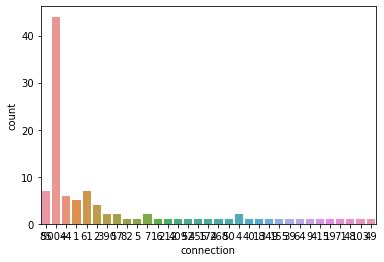

In [134]:
sns.countplot(x='connection', data=data_7)

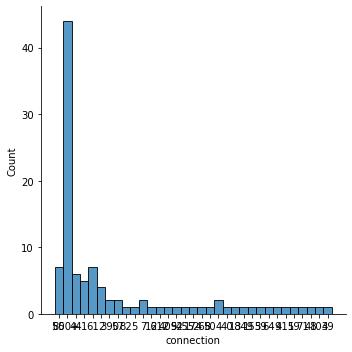

In [135]:
sns.displot(data_7['connection'])

In [ ]:
data_3['connection_encoded'] = connection_Encoding

In [ ]:
data_3

#Feature Scaling

In [177]:
from sklearn.preprocessing import MinMaxScaler

In [231]:
Labeled_data_2 = Labeled_data.copy()

Labeled_data_2

,job_title_embedding,connection,cosine_similarity
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",85,0.569894
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",500,0.231336
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",44,0.945019
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",500,0.295267
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",500,0.218546
...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",103,0.771218
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",500,0.747326
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",49,0.293233
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",500,0.243750


In [232]:
Labeled_data_2.drop(['job_title_embedding'], axis=1, inplace=True)

Labeled_data_2

,connection,cosine_similarity
0,85,0.569894
1,500,0.231336
2,44,0.945019
3,500,0.295267
4,500,0.218546
...,...,...
99,103,0.771218
100,500,0.747326
101,49,0.293233
102,500,0.243750


In [234]:
Labeled_data_2.drop(['cosine_similarity'], axis=1, inplace=True)

Labeled_data_2

,connection
0,85
1,500
2,44
3,500
4,500
...,...
99,103
100,500
101,49
102,500


In [242]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Labeled_data_2)
Labeled_data_2['scaled_connection'] = pd.DataFrame(scaled_data, 
                                                 columns=Labeled_data_2.columns)

ValueError: Wrong number of items passed 2, placement implies 1

In [236]:
Labeled_data_2['scaled_connection']

0      0.168337
1      1.000000
2      0.086172
3      1.000000
4      1.000000
         ...   
99     0.204409
100    1.000000
101    0.096192
102    1.000000
103    1.000000
Name: scaled_connection, Length: 104, dtype: float64

In [237]:
Labeled_data_2

,connection,scaled_connection
0,85,0.168337
1,500,1.000000
2,44,0.086172
3,500,1.000000
4,500,1.000000
...,...,...
99,103,0.204409
100,500,1.000000
101,49,0.096192
102,500,1.000000


In [238]:
Labeled_data_2.head(20)

,connection,scaled_connection
0,85,0.168337
1,500,1.000000
2,44,0.086172
3,500,1.000000
4,500,1.000000
5,1,0.000000
6,61,0.120240
7,500,1.000000
8,61,0.120240
9,500,1.000000


In [239]:
Labeled_data_2.tail(20)

,connection,scaled_connection
84,500,1.000000
85,4,0.006012
86,40,0.078156
87,18,0.034068
88,349,0.697395
89,155,0.308617
90,39,0.076152
91,64,0.126253
92,9,0.016032
93,415,0.829659


In [262]:
ranking_data = Labeled_data_2.copy()

ranking_data

,connection,scaled_connection
0,85,0.168337
1,500,1.000000
2,44,0.086172
3,500,1.000000
4,500,1.000000
...,...,...
99,103,0.204409
100,500,1.000000
101,49,0.096192
102,500,1.000000


In [263]:
ranking_data['job_title'] = Labeled_data['job_title_embedding']

ranking_data

,connection,scaled_connection,job_title
0,85,0.168337,"[-0.087259926, 0.08513387, 0.00034077963, 0.13..."
1,500,1.000000,"[0.013793945, 0.0234375, 0.06796265, 0.0773315..."
2,44,0.086172,"[-0.09277344, 0.037231445, 0.08280945, 0.02981..."
3,500,1.000000,"[-0.052111816, 0.03034668, 0.050097656, 0.1195..."
4,500,1.000000,"[-0.053027343, -0.16308594, 0.115039065, 0.054..."
...,...,...,...
99,103,0.204409,"[-0.008527628, 0.07666829, 0.010591635, 0.0730..."
100,500,1.000000,"[-0.005554199, 0.010528564, 0.08068848, 0.1632..."
101,49,0.096192,"[0.13376465, -0.047607422, -0.052319337, 0.066..."
102,500,1.000000,"[0.030303955, 0.056554157, 0.06352743, 0.09985..."


In [264]:
ranking_data['consine___similarity'] = Labeled_data['cosine_similarity']

ranking_data

,connection,scaled_connection,job_title,consine___similarity
0,85,0.168337,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894
1,500,1.000000,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336
2,44,0.086172,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019
3,500,1.000000,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267
4,500,1.000000,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546
...,...,...,...,...
99,103,0.204409,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218
100,500,1.000000,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326
101,49,0.096192,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233
102,500,1.000000,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750


In [265]:
ranking_data['cosine_similarity'] = ranking_data['consine___similarity']

ranking_data

,connection,scaled_connection,job_title,consine___similarity,cosine_similarity
0,85,0.168337,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,0.569894
1,500,1.000000,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,0.231336
2,44,0.086172,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,0.945019
3,500,1.000000,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,0.295267
4,500,1.000000,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,0.218546
...,...,...,...,...,...
99,103,0.204409,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,0.771218
100,500,1.000000,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,0.747326
101,49,0.096192,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,0.293233
102,500,1.000000,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,0.243750


In [266]:
ranking_data.drop(['consine___similarity'], axis=1, inplace=True)

ranking_data

,connection,scaled_connection,job_title,cosine_similarity
0,85,0.168337,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894
1,500,1.000000,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336
2,44,0.086172,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019
3,500,1.000000,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267
4,500,1.000000,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546
...,...,...,...,...
99,103,0.204409,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218
100,500,1.000000,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326
101,49,0.096192,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233
102,500,1.000000,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750


In [267]:
ranking_data.drop(['connection'], axis=1, inplace=True)

ranking_data

,scaled_connection,job_title,cosine_similarity
0,0.168337,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894
1,1.000000,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336
2,0.086172,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019
3,1.000000,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267
4,1.000000,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546
...,...,...,...
99,0.204409,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218
100,1.000000,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326
101,0.096192,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233
102,1.000000,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750


In [268]:
ranking_data = ranking_data[['job_title', 'cosine_similarity', 'scaled_connection']]

ranking_data

,job_title,cosine_similarity,scaled_connection
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,0.168337
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,1.000000
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,0.086172
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,1.000000
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,1.000000
...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,0.204409
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,1.000000
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,0.096192
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,1.000000


In [243]:
Labeled_data['scaled_connections'] = Labeled_data_2['scaled_connection']

Labeled_data

<ipython-input-243-e55dd24f242f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labeled_data['scaled_connections'] = Labeled_data_2['scaled_connection']


,job_title_embedding,connection,cosine_similarity,scaled_connection,scaled_connections
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",85,0.569894,0.168337,0.168337
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",500,0.231336,1.000000,1.000000
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",44,0.945019,0.086172,0.086172
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",500,0.295267,1.000000,1.000000
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",500,0.218546,1.000000,1.000000
...,...,...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",103,0.771218,0.204409,0.204409
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",500,0.747326,1.000000,1.000000
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",49,0.293233,0.096192,0.096192
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",500,0.243750,1.000000,1.000000


In [245]:
Labeled_data.drop(['scaled_connections'], axis=1, inplace=True)

Labeled_data

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,job_title_embedding,connection,cosine_similarity,scaled_connection
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",85,0.569894,0.168337
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",500,0.231336,1.000000
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",44,0.945019,0.086172
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",500,0.295267,1.000000
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",500,0.218546,1.000000
...,...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",103,0.771218,0.204409
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",500,0.747326,1.000000
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",49,0.293233,0.096192
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",500,0.243750,1.000000


In [246]:
Labeled_data.drop(['connection'], axis=1, inplace=True)

Labeled_data

,job_title_embedding,cosine_similarity,scaled_connection
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,0.168337
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,1.000000
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,0.086172
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,1.000000
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,1.000000
...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,0.204409
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,1.000000
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,0.096192
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,1.000000


In [ ]:
data_3['scaled_connection'] 

In [ ]:
data_3

In [ ]:
#scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(Data_Path)
#MinMax_Data = pd.DataFrame(scaled_data, 
                               #columns=Data_Path.columns)

In [ ]:
#data_3['connection'] = 

In [65]:
#from StandardScaler, Normalizer

In [ ]:
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(data_3)
#data_3['scaled_connection'] = pd.DataFrame(scaled_data, columns=data_3['connection'])

In [ ]:
#scaler = Normalizer()
#scaled_data = scaler.fit_transform(data_3)
#data_3['scaled_connection'] = pd.DataFrame(scaled_data, columns=data_3['connection'])

#Labeling (2)

In [247]:
Labeled_data = Labeled_data[['job_title_embedding', 'scaled_connection', 'cosine_similarity']]

Labeled_data

,job_title_embedding,scaled_connection,cosine_similarity
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.168337,0.569894
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",1.000000,0.231336
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.086172,0.945019
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",1.000000,0.295267
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",1.000000,0.218546
...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.204409,0.771218
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",1.000000,0.747326
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.096192,0.293233
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",1.000000,0.243750


#Ranking

In [248]:
Labeled_data['ranking'] = 0.75 * Labeled_data['cosine_similarity'] + 0.25 * Labeled_data['scaled_connection']

<ipython-input-248-981ba594c76f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labeled_data['ranking'] = 0.75 * Labeled_data['cosine_similarity'] + 0.25 * Labeled_data['scaled_connection']


In [249]:
Labeled_data['ranking']

0      0.469504
1      0.423502
2      0.730308
3      0.471450
4      0.413909
         ...   
99     0.629516
100    0.810494
101    0.243973
102    0.432812
103    0.434079
Name: ranking, Length: 104, dtype: float64

In [250]:
Labeled_data

,job_title_embedding,scaled_connection,cosine_similarity,ranking
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.168337,0.569894,0.469504
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",1.000000,0.231336,0.423502
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.086172,0.945019,0.730308
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",1.000000,0.295267,0.471450
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",1.000000,0.218546,0.413909
...,...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.204409,0.771218,0.629516
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",1.000000,0.747326,0.810494
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.096192,0.293233,0.243973
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",1.000000,0.243750,0.432812


In [270]:
ranking_data['ranking'] = 0.75 * ranking_data['cosine_similarity'] + 0.25 * ranking_data['scaled_connection']

<ipython-input-270-2dab1166de9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking_data['ranking'] = 0.75 * ranking_data['cosine_similarity'] + 0.25 * ranking_data['scaled_connection']


In [271]:
ranking_data['ranking']

0      0.469504
1      0.423502
2      0.730308
3      0.471450
4      0.413909
         ...   
99     0.629516
100    0.810494
101    0.243973
102    0.432812
103    0.434079
Name: ranking, Length: 104, dtype: float64

In [272]:
ranking_data

,job_title,cosine_similarity,scaled_connection,ranking
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,0.168337,0.469504
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,1.000000,0.423502
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,0.086172,0.730308
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,1.000000,0.471450
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,1.000000,0.413909
...,...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,0.204409,0.629516
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,1.000000,0.810494
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,0.096192,0.243973
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,1.000000,0.432812


#Sorting (Desecending)

In [260]:
Labeled_data['ranking'] = Labeled_data['ranking'].sort_values(ascending=False)

<ipython-input-260-d37af11b6d36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Labeled_data['ranking'] = Labeled_data['ranking'].sort_values(ascending=False)


In [261]:
Labeled_data['ranking']

0      0.469504
1      0.423502
2      0.730308
3      0.471450
4      0.413909
         ...   
99     0.629516
100    0.810494
101    0.243973
102    0.432812
103    0.434079
Name: ranking, Length: 104, dtype: float64

In [254]:
Labeled_data

,job_title_embedding,scaled_connection,cosine_similarity,ranking
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.168337,0.569894,0.469504
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",1.000000,0.231336,0.423502
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.086172,0.945019,0.730308
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",1.000000,0.295267,0.471450
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",1.000000,0.218546,0.413909
...,...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.204409,0.771218,0.629516
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",1.000000,0.747326,0.810494
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.096192,0.293233,0.243973
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",1.000000,0.243750,0.432812


In [278]:
ranking_data['ranking_Sorted'] = ranking_data['ranking'].sort_values(ascending=False)

<ipython-input-278-90c9a7db0da7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking_data['ranking_Sorted'] = ranking_data['ranking'].sort_values(ascending=False)


In [274]:
ranking_data['ranking']

0      0.469504
1      0.423502
2      0.730308
3      0.471450
4      0.413909
         ...   
99     0.629516
100    0.810494
101    0.243973
102    0.432812
103    0.434079
Name: ranking, Length: 104, dtype: float64

In [280]:
ranking_data['ranking_Sorted']

0      0.469504
1      0.423502
2      0.730308
3      0.471450
4      0.413909
         ...   
99     0.629516
100    0.810494
101    0.243973
102    0.432812
103    0.434079
Name: ranking_Sorted, Length: 104, dtype: float64

In [279]:
ranking_data

,job_title,cosine_similarity,scaled_connection,ranking,ranking_Sorted
0,"[-0.087259926, 0.08513387, 0.00034077963, 0.13...",0.569894,0.168337,0.469504,0.469504
1,"[0.013793945, 0.0234375, 0.06796265, 0.0773315...",0.231336,1.000000,0.423502,0.423502
2,"[-0.09277344, 0.037231445, 0.08280945, 0.02981...",0.945019,0.086172,0.730308,0.730308
3,"[-0.052111816, 0.03034668, 0.050097656, 0.1195...",0.295267,1.000000,0.471450,0.471450
4,"[-0.053027343, -0.16308594, 0.115039065, 0.054...",0.218546,1.000000,0.413909,0.413909
...,...,...,...,...,...
99,"[-0.008527628, 0.07666829, 0.010591635, 0.0730...",0.771218,0.204409,0.629516,0.629516
100,"[-0.005554199, 0.010528564, 0.08068848, 0.1632...",0.747326,1.000000,0.810494,0.810494
101,"[0.13376465, -0.047607422, -0.052319337, 0.066...",0.293233,0.096192,0.243973,0.243973
102,"[0.030303955, 0.056554157, 0.06352743, 0.09985...",0.243750,1.000000,0.432812,0.432812


In [ ]:
#Will be continue working on the other Word Embedding Models (Bert, Mini_LM & FastText) after solving the sorting issue

In [ ]:
data_3['ranking']

In [ ]:
data_3

#Correlation Coefficient

In [35]:
data.corr()

,fit
fit,NaN


In [ ]:
data_3.corr()

In [ ]:
heatmap = sns.heatmap(data_3.corr(), vmin=-1, vmax=1, annot=True,cmap="rocket_r")

heatmap.set_title('Correlation Cofficient Heatmap', fontdict={'fontsize':12}, pad=12);

# Building the Model

Ranking Models:

In [36]:
#RankNet

In [37]:
#LambdaMart



In [38]:
#LightGPM

In [ ]:
#pip install lightgbm

In [40]:
import lightgbm as lgb

In [41]:
LGB_Model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)

In [ ]:
LGB_Model.fit(x_train,y_train,
              eval_set=[(x_test,y_test),(x_train,y_train)], 
              verbose=20,eval_metric='logloss')